In [2]:


import numpy as np 
import pandas as pd 


In [3]:
dataset_file = "tweets.csv"
import chardet
with open(dataset_file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [4]:
df = pd.read_csv(dataset_file, encoding = "ISO-8859-1")
df.columns = ["target", "ids", "date", "flag", "user", "text"]
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df1 = df.drop(["ids", "date", "flag", "user"], axis = "columns")
df1.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [7]:
df1.groupby("target")['target'].agg('count')

target
0    799999
4    800000
Name: target, dtype: int64

In [8]:
import re
def clean_text(input_text, query):
    r = re.findall(query, input_text)
    for word in r:
        input_text = re.sub(word, "", input_text)
    return input_text

In [9]:
#remove usernames
df1['cleaned_text'] = np.vectorize(clean_text)(df['text'], "@[\w]*")
df1.head()

,target,text,cleaned_text
0,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,@Kwesidei not the whole crew,not the whole crew


In [10]:
# remove everything other than a-z,A-Z, #
df1['cleaned_text'] = df1['cleaned_text'].str.replace("[^a-zA-Z#]", " ")
df1.head()

C:\Users\Tejas\AppData\Local\Temp/ipykernel_19260/808689650.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['cleaned_text'] = df1['cleaned_text'].str.replace("[^a-zA-Z#]", " ")


,target,text,cleaned_text
0,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...
4,0,@Kwesidei not the whole crew,not the whole crew


In [11]:
#remove short words
df1['cleaned_text'] = df1['cleaned_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df1.head()

,target,text,cleaned_text
0,0,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
1,0,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behaving here because over there
4,0,@Kwesidei not the whole crew,whole crew


In [12]:
# tokeninzing
tokenized_text = df1['cleaned_text'].apply(lambda x: x.split())
tokenized_text.head()

0    [upset, that, update, Facebook, texting, might...
1    [dived, many, times, ball, Managed, save, rest...
2              [whole, body, feels, itchy, like, fire]
3               [behaving, here, because, over, there]
4                                        [whole, crew]
Name: cleaned_text, dtype: object

In [13]:
# stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_text.head()

0    [upset, that, updat, facebook, text, might, re...
1    [dive, mani, time, ball, manag, save, rest, bo...
2               [whole, bodi, feel, itchi, like, fire]
3                   [behav, here, becaus, over, there]
4                                        [whole, crew]
Name: cleaned_text, dtype: object

In [14]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])
    
df1['cleaned_text'] = tokenized_text
df1.head()

,target,text,cleaned_text
0,0,is upset that he can't update his Facebook by ...,upset that updat facebook text might result sc...
1,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest bound
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,"@nationwideclass no, it's not behaving at all....",behav here becaus over there
4,0,@Kwesidei not the whole crew,whole crew


In [15]:
!pip install wordcloud

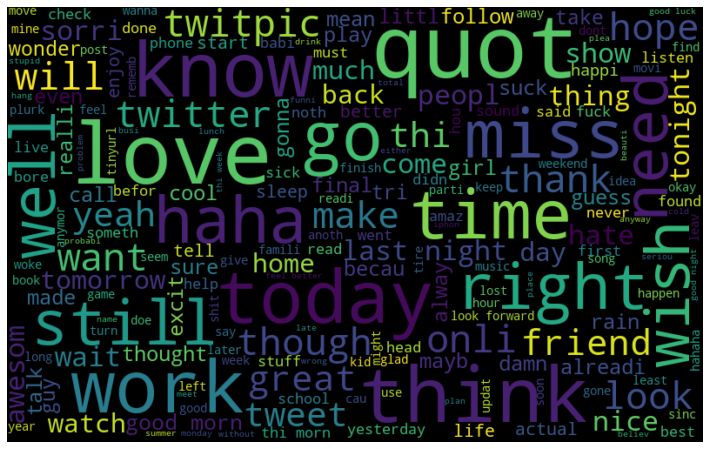

In [16]:
# visualize
import matplotlib.pyplot as plt
all_words = " ".join([sentence for sentence in df1['cleaned_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

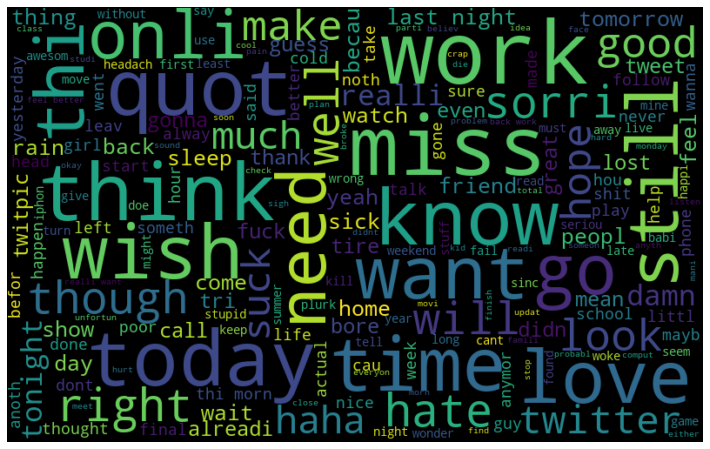

In [17]:
# visualization for -ve
all_words = " ".join([sentence for sentence in df1['cleaned_text'][df1['target']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear' )
plt.axis('off')
plt.show()

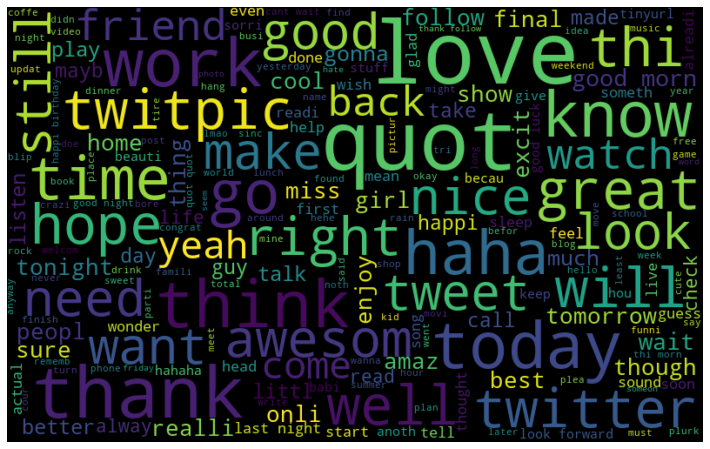

In [18]:
# visualization for +ve
all_words = " ".join([sentence for sentence in df1['cleaned_text'][df1['target']==4]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear',  cmap= "plasma")
plt.axis('off')
plt.show()

In [19]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_df=0.90, min_df=2, max_features=70000, stop_words='english')
bag_of_words = CV.fit_transform(df1['cleaned_text'])

In [20]:
# splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df1['target'], random_state=1 , test_size=0.3)


In [21]:
# training
from sklearn.linear_model import LogisticRegression


In [22]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
model.score(x_test, y_test)

0.75570625

In [24]:
y_predicted  = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predicted)
cm

array([[174160,  65874],
       [ 51387, 188579]], dtype=int64)

Text(69.0, 0.5, 'Truth')

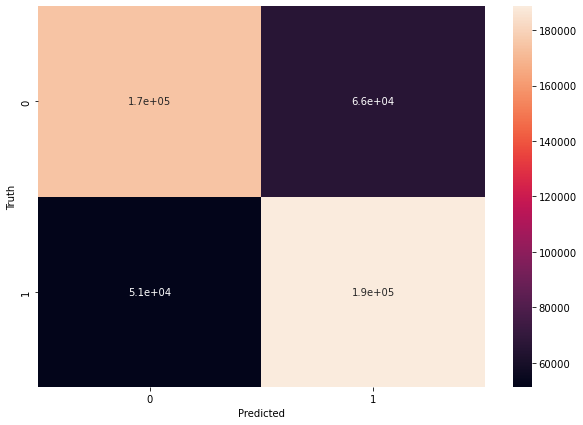

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)
svm_model.score(x_test, y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train.todense(), y_train.todense())
GNB.score(x_test.todense(), y_test.todense())